# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy as sp

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/geoki-wan_kenobi/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


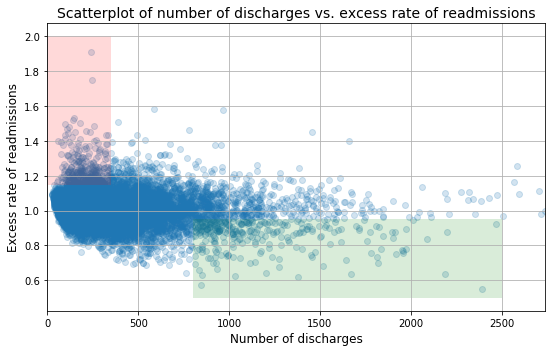

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

<div class="span5 alert alert-info">
<h2> A. Do you agree with the above analysis and recommendations? Why or why not? </h2>
Overall they did a good job with properly disposing of null values. As for the statistical part, they did not test for any correlations or statistical significance. There was no hypothesis testing either. But see below for the analysis. To save time we will rely on the sns joinplot that is reliable and calculates p-values faster than hard coding


In [5]:
#here we just try to feel the data's shape
hospital_read_df.shape

(16860, 12)

In [6]:
# check if there is missing data (and there is)
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [7]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


<div class="span5 alert alert-success">
Here we try to see if the readmissions is in fact trending down with increasing number of discharges

In [8]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
df1 = pd.concat([x,y], axis=1)   #make sure they concat by column
df1.columns = ['discharges', 'excess_readmissions']
df1.head(10)

,discharges,excess_readmissions
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123
5,31,1.0992
6,33,1.0847
7,34,1.0738
8,34,1.0720
9,34,1.0651


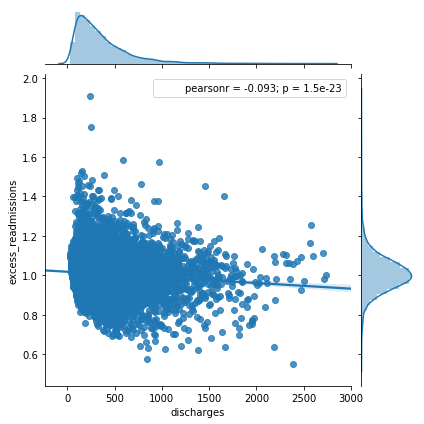

In [9]:
sns.jointplot('discharges', 'excess_readmissions', data=df1, kind='reg')

<div class="span5 alert alert-danger">
Here we se that the hypothesis is true as indicated by the small p-value. So yes, trending down with increasing number of discharges.

<div class="span5 alert alert-success">
Here we check if with lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

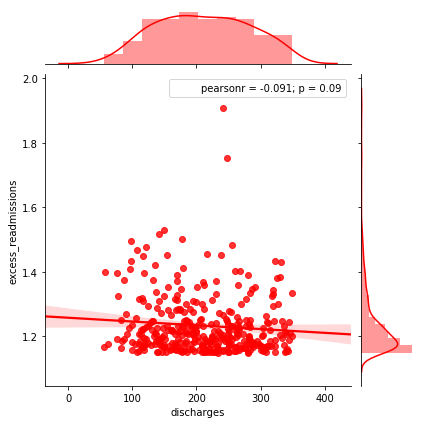

In [10]:
df_red = df1[df1.discharges <= 350]
df_red = df_red[df_red['excess_readmissions'] >= 1.15]
df_red = df_red[df_red['excess_readmissions'] <= 2.00]
sns.jointplot('discharges', 'excess_readmissions', data=df_red, color = 'red' , kind='reg')

<div class="span5 alert alert-danger">
Here we se that the hypothesis is not true because the p-value it is over .05 but nonetheless small, therefore can still be considered statistically significant. 

<div class="span5 alert alert-success">
Here we check if with higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

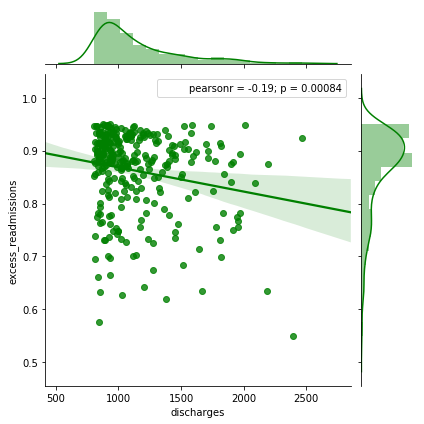

In [11]:
df_green = df1[df1.discharges >= 800]
df_green = df_green[df_green.discharges <= 2500]
df_green = df_green[df_green['excess_readmissions'] >= 0.50]
df_green = df_green[df_green['excess_readmissions'] <= 0.95]
sns.jointplot('discharges', 'excess_readmissions', data=df_green, kind='reg', color="g")

<div class="span5 alert alert-danger">
Here we se that the hypothesis is true because the p-value very small, therefore considered statistically significant.

<div class="span5 alert alert-success">
Here we see if In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [12]:
df_small = df1[df1.discharges < 100]
discharges_small, excess_readmissions_small = df_small.mean()
greater_than_one = len(df_small[df_small.excess_readmissions > 1]) / len(df_small)

print('Excess readmission rate is', excess_readmissions_small, 'and', greater_than_one, 'have excess readmission rate greater than 1.')


Excess readmission rate is 1.02261835017 and 0.6321548821548821 have excess readmission rate greater than 1.


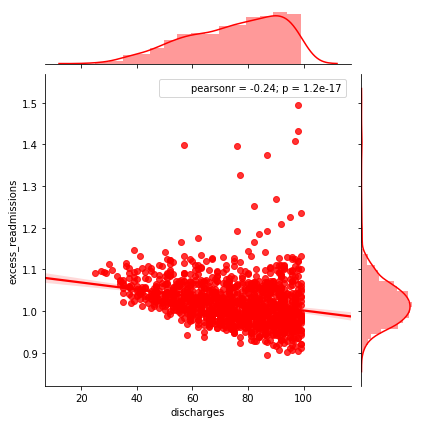

In [13]:
### to confirm the hypothesis where we gget a small p-value
sns.jointplot('discharges', 'excess_readmissions', data=df_small, kind='reg', color='r')

<div class="span5 alert alert-danger">

Based on this information, we can recommend that they have higher discharges so that the capacity is freed thus lowering the excess readmission rates. Reallocating of resources from hospitals with higher ecess readmission rates to hospitals with lower excess readmissions. 

<div class="span5 alert alert-info">

<h2> B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
Setup an appropriate hypothesis test.</h2>

Compute and report the observed significance value (or p-value).

Report statistical significance for  α= .01.

Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Look at the scatterplot above.
   
    What are the advantages and disadvantages of using this plot to convey information?

    Construct another plot that conveys the same information in a more direct manner.
    
   

<div class="span5 alert alert-success">

<h4> Proposed Null hypothesis: Number of discharges and readmission rates are NOT strongly (significantly) correlated. </h4>

<h4>Alternative hypothesis: Number of discharges and readmission rates are strongly (significantly) correlated. </h4>

In [14]:
df=hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
df.shape

(11578, 12)

In [15]:
df=df[df['Number of Readmissions'].notnull()]
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [16]:
df['Number of Discharges']=pd.to_numeric(df['Number of Discharges'])
df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [17]:
df.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [18]:
# Correlation of number of discharges with Excess Readmission rate
r=-0.097398

# We calculate r_sqr
r_sqr = r**2
print(r_sqr)

0.009486370404


<div class="span5 alert alert-info">

So we calculate the p-value to compare to alpha

In [19]:
import scipy.stats as stats
import numpy as np
n =len(df)
n2 = n-2

In [20]:
#using t statistics
t=(r*((n-2)/(1-r**2))**0.5)
t

-10.492386957113085

In [21]:
# two-sided p-value is defined by Prob(abs(t)>tt)
p_value = stats.t.sf(np.abs(t), n2)*2  
print('The p-vaue is', p_value)

The p-vaue is 1.22246862341e-25


<div class="span5 alert alert-success">

We have proven that the null hypothesis can be rejected and that there is significant correlation between hospital number of discharges and readmission rates. The correlation between the two is a negative correlation given by the corr value (-.0973). The magnitude suggests that if there is an increase of number of discharges there is a small decrease in excess readmission ratio. The R-sqr of .001 signifies that the variability in the excess readmission ratio is affected weakly by the number of discharges. This is goes against my earlier recommendation. So therefore, we must look for other variables.  

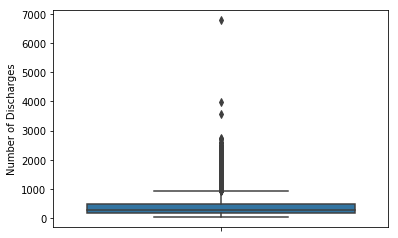

In [22]:
import seaborn as sns
sns.set_style()
_ = sns.boxplot(y=df['Number of Discharges'])

In [24]:
df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


In [30]:
# hospitals with number of discharges>1000 
large_discharges = df[df['Number of Discharges']>1000]
print('Number of hospitals with number of discharges>1000 is',len(large_discharges))

# hospitals with excess readmission ratios >1
excess_read =large_discharges [large_discharges ['Excess Readmission Ratio']>1]
print('Number of hospitals with excess readmission ratios >1 is',len(excess_read))


Number of hospitals with number of discharges>1000 is 463
Number of hospitals with excess readmission ratios >1 is 206


So we separate the hospitals into type 1 and type 2 hospitals according to below thresholds

In [31]:
type_1=df[df['Excess Readmission Ratio']<=1]
type_2=df[df['Excess Readmission Ratio']>1]

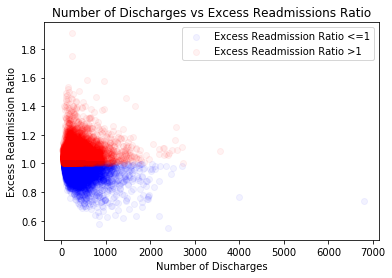

In [40]:
plt.scatter(type_1['Number of Discharges'], type_1['Excess Readmission Ratio'], color='b', label="Excess Readmission Ratio <=1", alpha=0.05)
plt.scatter(type_2['Number of Discharges'], type_2['Excess Readmission Ratio'], color='r', label='Excess Readmission Ratio >1', alpha=0.05)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

In [51]:
#for hospital with excess readmission ratios <=1
P_1 = len(type_1)/ (len(type_2) +len(type_1))
P_1

0.4834304601200313

In [52]:
#for hospital with Excess Readmission Ratio >1
P_2 = (1- P_1)
P_2

0.5165695398799687

In [58]:
type_1['Number of Discharges'].describe()

count    5558.000000
mean      381.295250
std       322.753963
min        51.000000
25%       168.000000
50%       294.000000
75%       489.000000
max      6793.000000
Name: Number of Discharges, dtype: float64

In [60]:
#Difference in mean of numner of discharges
mean_diff = np.mean(type_1['Number of Discharges']) - np.mean(type_2['Number of Discharges'])
mean_diff

30.64261496620219

In [74]:
std_1 = np.std(type_1['Number of Discharges'])
std_2 = np.std(type_2['Number of Discharges'])
count_1 = len(type_1['Number of Discharges'])
count_2 = len(type_2['Number of Discharges'])

print(std_1, count_1, std_2,  count_1)

322.72492665207096 5558 294.2845343663914 5558


In [75]:
# std of differneces in mean of numner of discharges
std_diff= np.sqrt(((322.753963**2)/5558) + ((294.309313**2)/5939))
std_diff

5.7729524950854332

In [76]:
# we use alpha for moe
moe = std_diff *1.96
moe

11.314986890367448

In [78]:
# we then calculate the confidence interval for the difference in the number of discharges
ci = mean_diff + np.array([-1, 1]) * moe
ci

array([ 19.32762808,  41.95760186])

In [80]:
# here we calculate the degrees of freedom
count_1
count_2
H1=(322.753963**2)/count_1
H2=(294.309313**2)/count_2

degrees_freedom =((H1+H2)**2)/(((H1**2)/count_1)+((H2**2)/count_2))
degrees_freedom

11217.039092559779

In [81]:
# we now compute the t-value
t = mean_diff/std_diff
t

5.3079624320983978

In [82]:
# we comput the two-sided p-value
p = stats.t.sf(np.abs(t), degrees_freedom)*2  
p_value

1.2224686234119185e-25

<div class="span5 alert alert-success">

We build a better plot to convey the findings.

<div class="span5 alert alert-danger">

Using the above plot to convey the infromation has its disadvantages in that it is difficult to quantify the difference between the hospitals that have excess readmission ratios less than or greater then one as analyzed in above code. 

Below is a plot reconstructed to make the visual representation more informative

In [86]:
from scipy import stats  
x=df['Number of Discharges']
y=df['Excess Readmission Ratio']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

-2.90105173306e-05 1.01810614737 -0.0973979435108 1.22254737767e-25 2.76491273491e-06


In [88]:
# Here we construct the regression line
X=df['Number of Discharges'].sort_values()
y_trend=(-2.901e-05)*X + 1.02

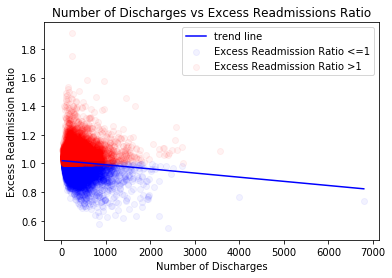

In [89]:
# We replot the scatter plot with the information obtained by statistical analysis
plt.scatter(type_1['Number of Discharges'], type_1['Excess Readmission Ratio'], color='b', label="Excess Readmission Ratio <=1", alpha=0.05)
plt.scatter(type_2['Number of Discharges'], type_2['Excess Readmission Ratio'], color='r', label='Excess Readmission Ratio >1', alpha=0.05)
plt.plot(X, y_trend, c='b', label='trend line')
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

# Discussion

The first conclusion given by statistical analysis (hypothesis test) was that the number of discharges are related to excess readmission ratios. The weak correlation suggest that there are other variables that can lead to the changes in Excess readmission ratios. Based on the data, a soultion can be to combine smaller hospitals (resources) to increase discharge rates. This suggestion may not be cost effective. 